<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25619 entries, 0 to 25618
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AnimalID         25619 non-null  int64  
 1   Breed            25611 non-null  object 
 2   ShotsDate        3748 non-null   object 
 3   Sex              25335 non-null  object 
 4   ReceiptNumber    21310 non-null  object 
 5   DateImpounded    25619 non-null  object 
 6   PitNumber        17763 non-null  float64
 7   Name             22897 non-null  object 
 8   KennelNumber     25598 non-null  object 
 9   DispositionDate  11857 non-null  object 
 10  Color            25576 non-null  object 
 11  Code             1173 non-null   object 
 12  ApproxWeight     11633 non-null  object 
 13  Age category     7597 non-null   object 
 14  Source           23645 non-null  object 
 15  Status           25610 non-null  object 
 16  ACO              21054 non-null  object 
 17  EnteredBy   

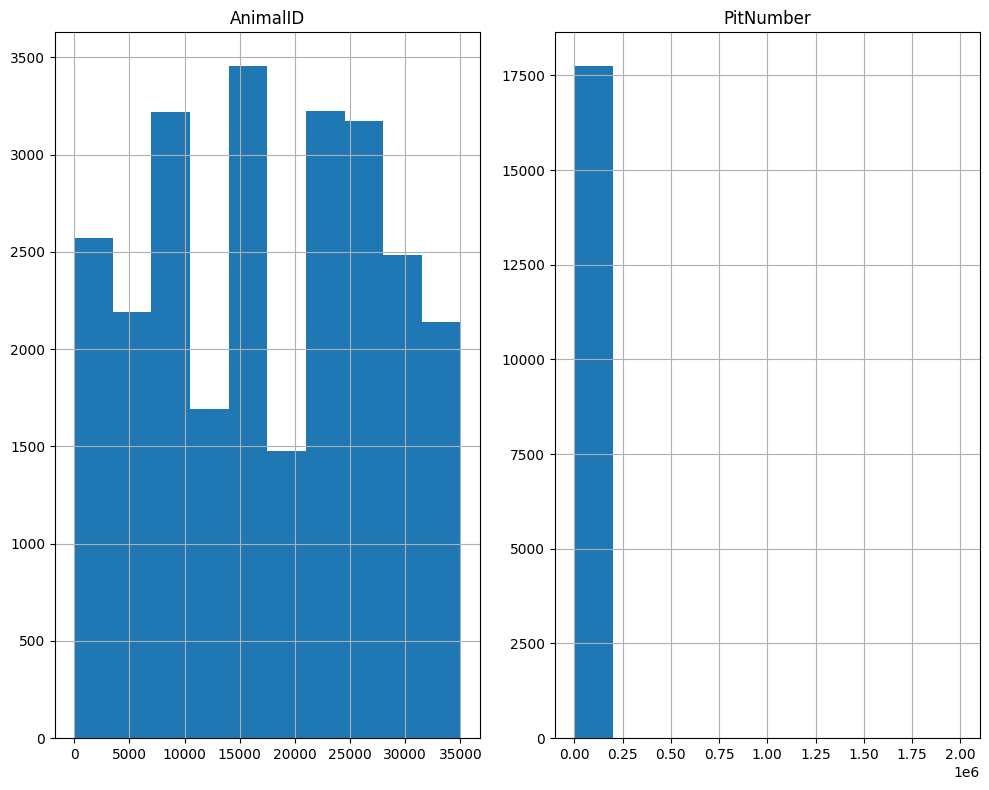

In [4]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cell 2: Load the dataset with additional parameters
file_path = 'animal-control-inventory-register.csv'

# Set the correct delimiter as semicolon
df = pd.read_csv(file_path, sep=';', encoding='utf-8', on_bad_lines='skip')

# Cell 3: Preview the dataset
df.head()

# Cell 4: Check for basic info of the dataset
df.info()

# Cell 5: Check for missing values
df.isnull().sum()

# Cell 6: Get basic descriptive statistics for numerical columns
df.describe()

# Cell 7: Visualize the distribution of numerical columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

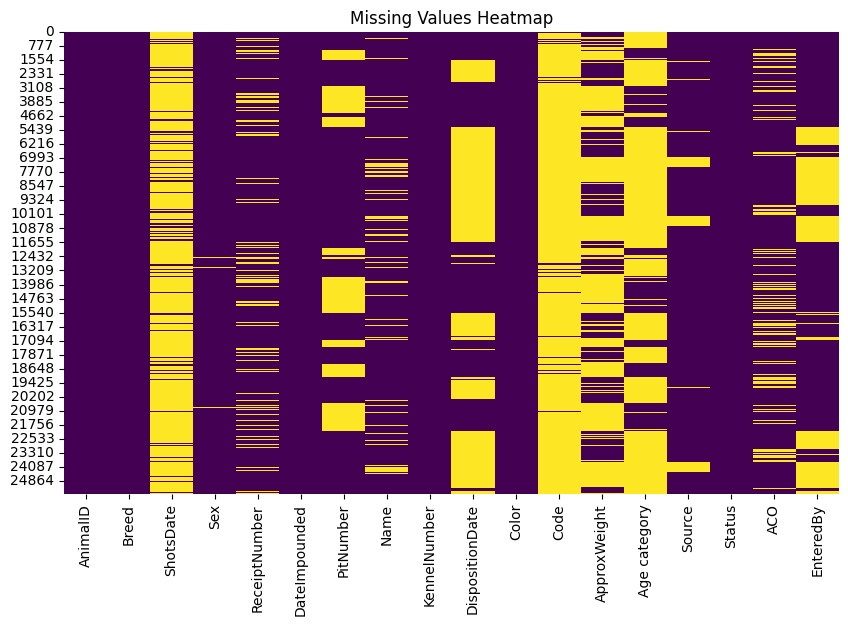

<class 'pandas.core.frame.DataFrame'>
Index: 3564 entries, 0 to 25618
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AnimalID         3564 non-null   int64  
 1   Breed            3564 non-null   object 
 2   ShotsDate        1642 non-null   object 
 3   Sex              3564 non-null   object 
 4   ReceiptNumber    3463 non-null   object 
 5   DateImpounded    3564 non-null   object 
 6   PitNumber        3070 non-null   float64
 7   Name             3564 non-null   object 
 8   KennelNumber     3564 non-null   object 
 9   DispositionDate  2975 non-null   object 
 10  Color            3564 non-null   object 
 11  Code             1113 non-null   object 
 12  ApproxWeight     2985 non-null   object 
 13  Age category     644 non-null    object 
 14  Source           3563 non-null   object 
 15  Status           3564 non-null   object 
 16  ACO              3368 non-null   object 
 17  EnteredBy        3

In [6]:
# Cell 8: Visualize missing values in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Cell 9: Drop rows with too many missing values (if any)
df_cleaned = df.dropna(thresh=len(df.columns) - 3)  # Drop rows missing more than 3 values
df_cleaned.info()


In [7]:
# Cell 10: Convert `DateImpounded` and `DispositionDate` to datetime format
df_cleaned['DateImpounded'] = pd.to_datetime(df_cleaned['DateImpounded'], errors='coerce')
df_cleaned['DispositionDate'] = pd.to_datetime(df_cleaned['DispositionDate'], errors='coerce')

# Cell 11: Convert `ApproxWeight` to numerical format (handling non-numeric values)
df_cleaned['ApproxWeight'] = pd.to_numeric(df_cleaned['ApproxWeight'], errors='coerce')

# Cell 12: Extract year and month from the impound date for trend analysis
df_cleaned['ImpoundYear'] = df_cleaned['DateImpounded'].dt.year
df_cleaned['ImpoundMonth'] = df_cleaned['DateImpounded'].dt.month

# Cell 13: Preview cleaned data
df_cleaned.head()


<ipython-input-7-843f54fb2b53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DateImpounded'] = pd.to_datetime(df_cleaned['DateImpounded'], errors='coerce')
<ipython-input-7-843f54fb2b53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DispositionDate'] = pd.to_datetime(df_cleaned['DispositionDate'], errors='coerce')
<ipython-input-7-843f54fb2b53>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,AnimalID,Breed,ShotsDate,Sex,ReceiptNumber,DateImpounded,PitNumber,Name,KennelNumber,DispositionDate,Color,Code,ApproxWeight,Age category,Source,Status,ACO,EnteredBy,ImpoundYear,ImpoundMonth
0,21428,Tibetan Mastiff,NaN,M/N,10-213726DI - TU,2010-11-01,20053.0,Rocky,200,2010-11-02,Black & Tan,NaN,NaN,NaN,HOLDING STRAY,Redeemed,22,Lori Fitzgerald,2010,11
1,21430,Chihuahua,NaN,M,10-213856DI - TU,2010-11-01,20021.0,Juno,200,2010-11-02,White & Tan (Long Hair),NaN,NaN,NaN,HOLDING STRAY,Redeemed,22,Lori Fitzgerald,2010,11
4,21438,Shih Tzu X,NaN,M/N,10 - 218491,2010-11-03,20041.0,Toby,200,2010-11-09,White & Grey,NaN,NaN,NaN,HOLDING STRAY,Redeemed,ks19,Karen Sinclair,2010,11
5,21439,Lab X Rottie,NaN,M,10 - 204997,2010-11-04,20010.0,Dodger (aka Decker),200,2010-11-09,Black,NaN,NaN,NaN,HOLDING STRAY,Redeemed,21,Guy Palanuik,2010,11
6,21441,Yellow Lab,NaN,F,10-214259,2010-11-05,20037.0,Emma,200,2010-11-06,Yellow,NaN,NaN,NaN,HOLDING STRAY,Redeemed,23,Ching Koo,2010,11


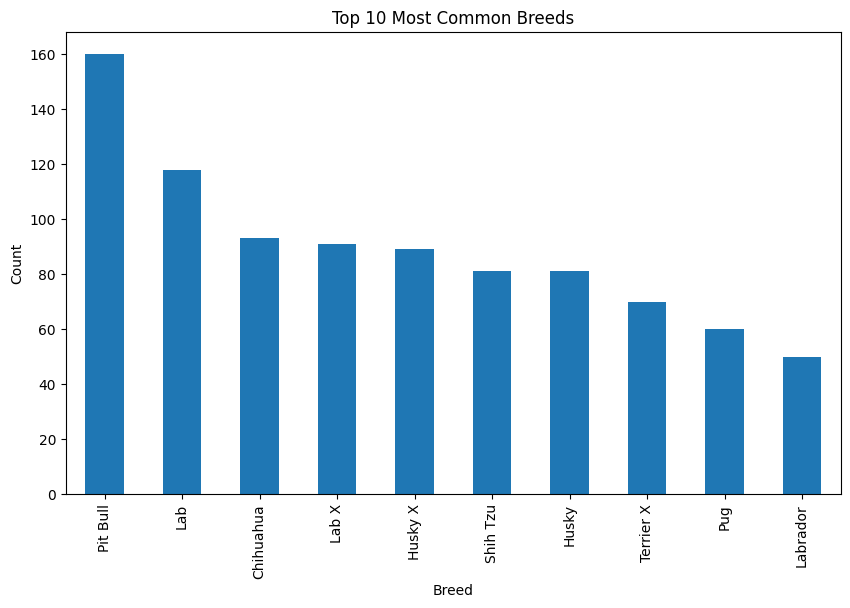

In [8]:
# Cell 14: Most common breeds in the dataset
plt.figure(figsize=(10, 6))
df_cleaned['Breed'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.show()


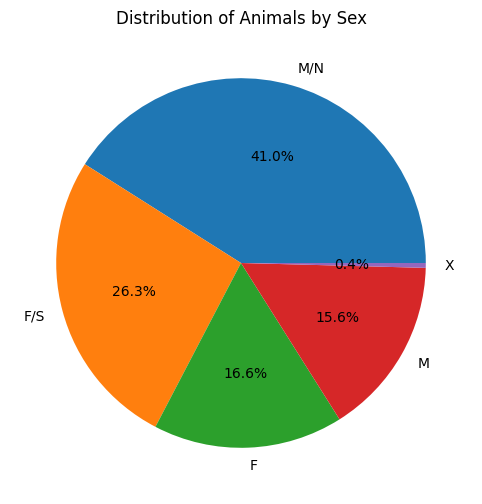

In [9]:
# Cell 15: Distribution of animals by sex
plt.figure(figsize=(8, 6))
df_cleaned['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Animals by Sex')
plt.ylabel('')  # Removing y-label for better pie chart view
plt.show()


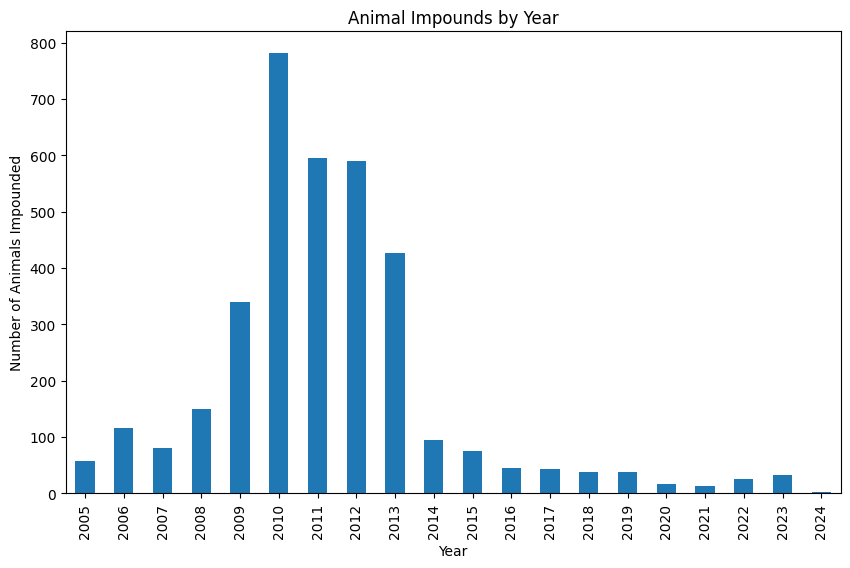

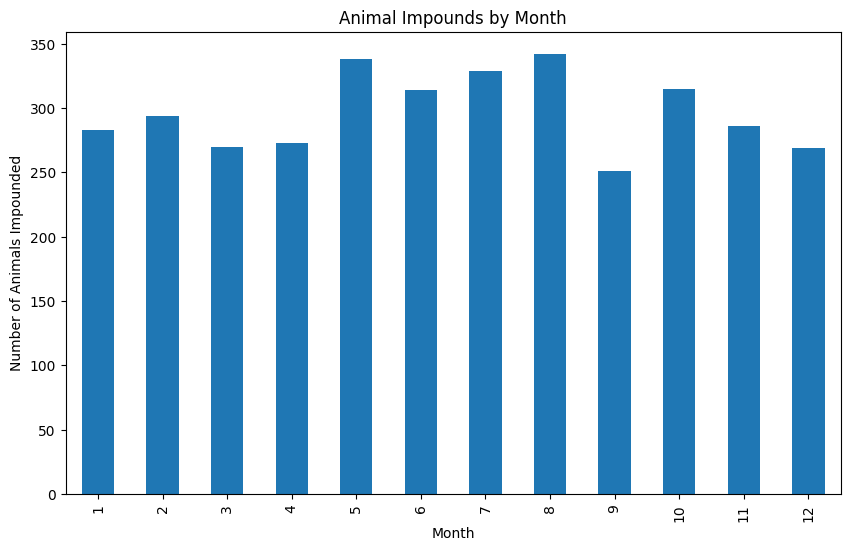

In [10]:
# Cell 16: Impound trends by year
plt.figure(figsize=(10, 6))
df_cleaned.groupby('ImpoundYear').size().plot(kind='bar')
plt.title('Animal Impounds by Year')
plt.xlabel('Year')
plt.ylabel('Number of Animals Impounded')
plt.show()

# Cell 17: Impound trends by month
plt.figure(figsize=(10, 6))
df_cleaned.groupby('ImpoundMonth').size().plot(kind='bar')
plt.title('Animal Impounds by Month')
plt.xlabel('Month')
plt.ylabel('Number of Animals Impounded')
plt.show()


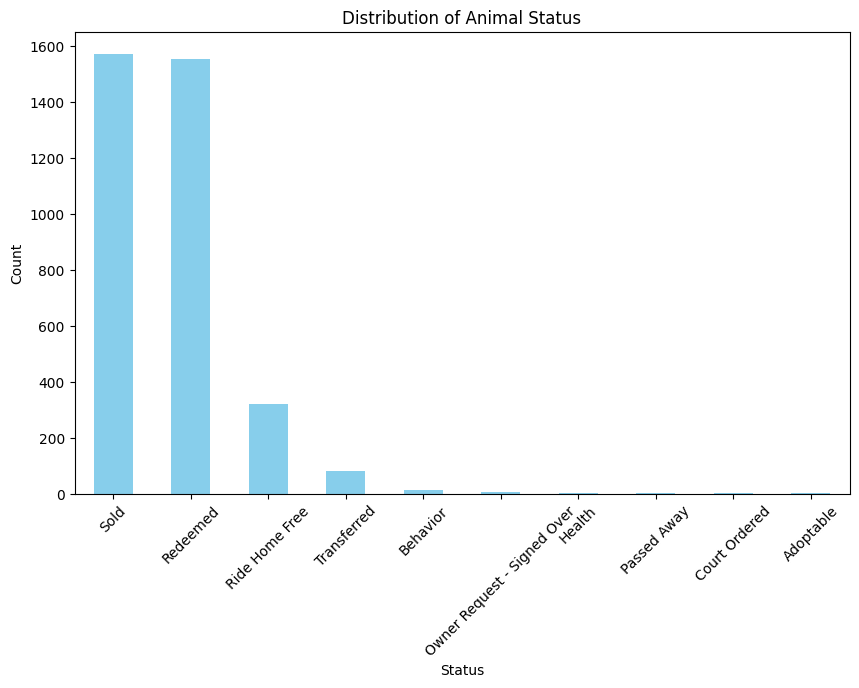

In [11]:
# Cell 18: Distribution of animal status
plt.figure(figsize=(10, 6))
df_cleaned['Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Animal Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-b1852455cef2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LengthOfStay'] = (df_cleaned['DispositionDate'] - df_cleaned['DateImpounded']).dt.days


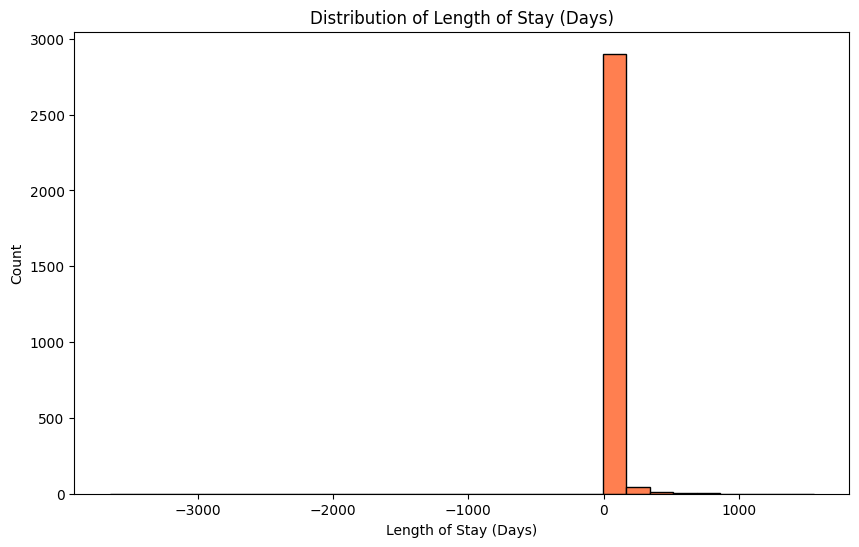

In [12]:
# Cell 19: Calculate length of stay in the shelter
df_cleaned['LengthOfStay'] = (df_cleaned['DispositionDate'] - df_cleaned['DateImpounded']).dt.days

# Cell 20: Distribution of length of stay
plt.figure(figsize=(10, 6))
df_cleaned['LengthOfStay'].dropna().plot(kind='hist', bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Length of Stay (Days)')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Count')
plt.show()


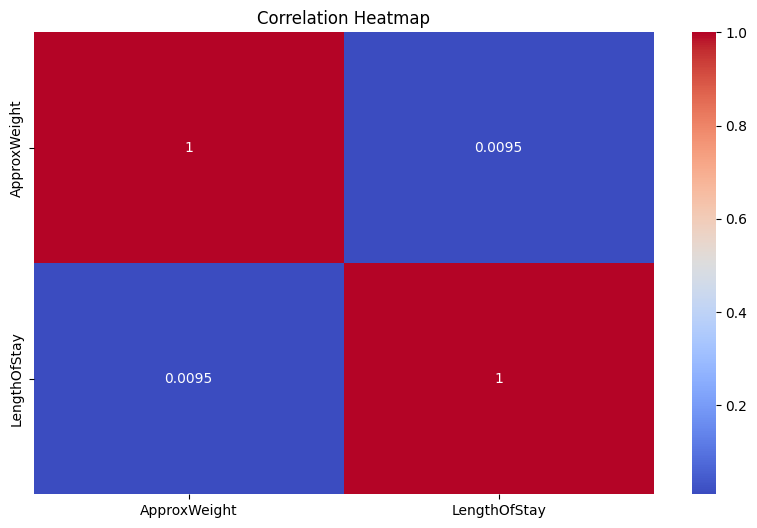

In [13]:
# Cell 21: Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df_cleaned[['ApproxWeight', 'LengthOfStay']].corr()  # Add more columns if relevant
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


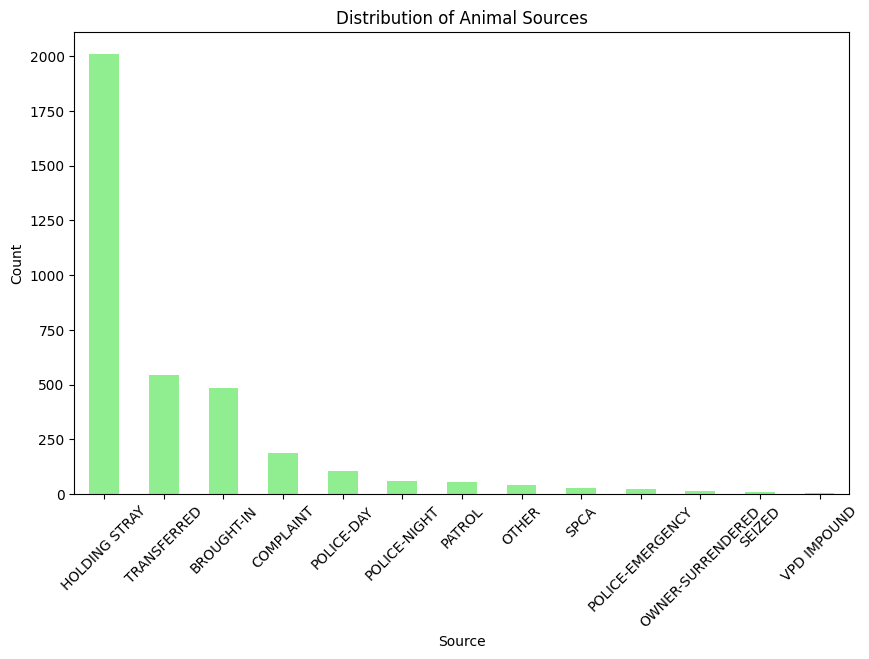

In [14]:
# Cell 22: Distribution of animal sources
plt.figure(figsize=(10, 6))
df_cleaned['Source'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Animal Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


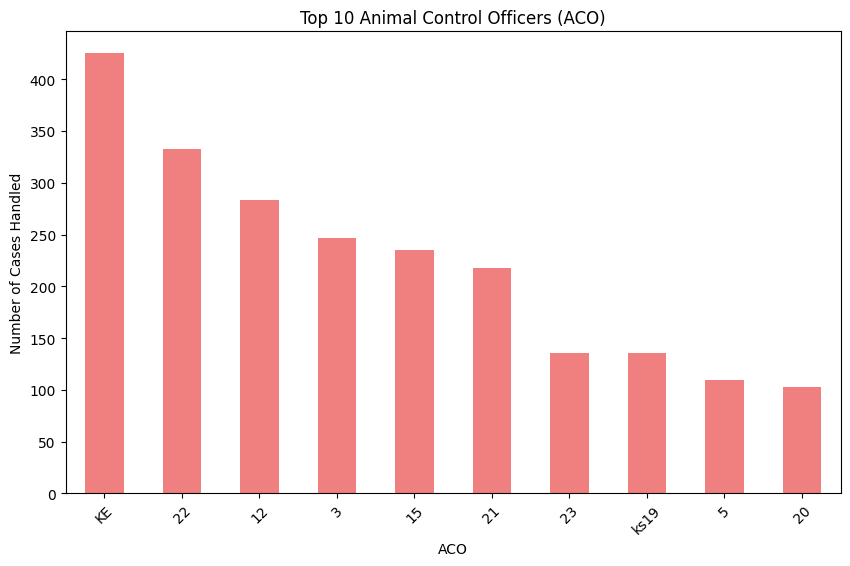

In [15]:
# Cell 23: Top 10 Animal Control Officers by number of cases handled
plt.figure(figsize=(10, 6))
df_cleaned['ACO'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Animal Control Officers (ACO)')
plt.xlabel('ACO')
plt.ylabel('Number of Cases Handled')
plt.xticks(rotation=45)
plt.show()


<ipython-input-16-143757289836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearDisposition'] = df_cleaned['DispositionDate'].dt.year


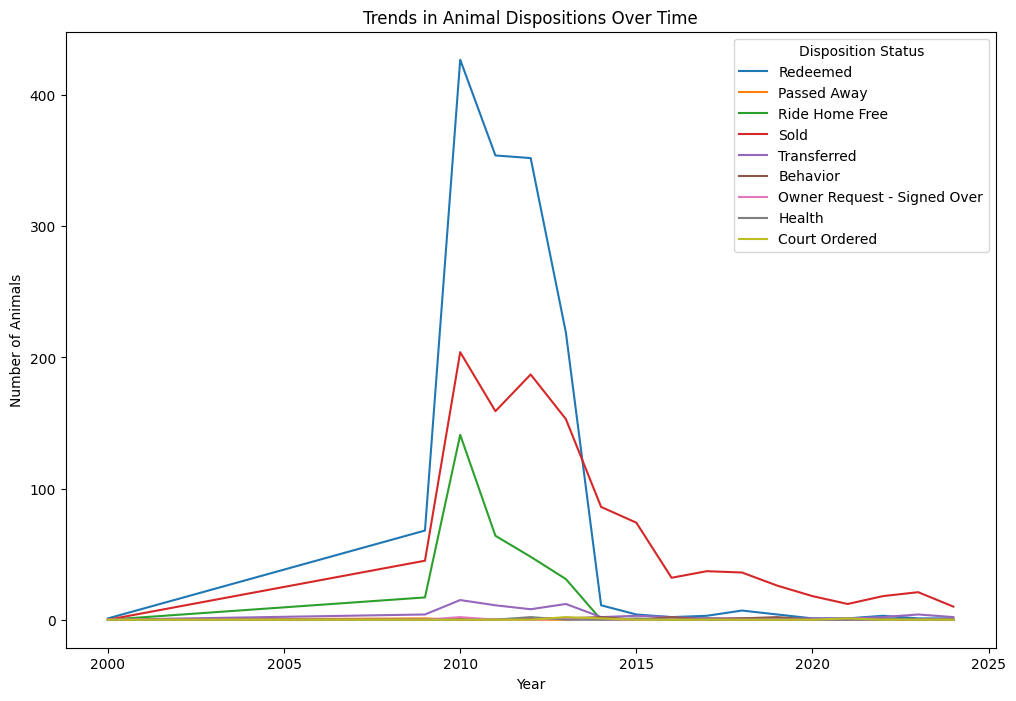

In [16]:
# Cell 24: Trends in animal dispositions over time
df_cleaned['YearDisposition'] = df_cleaned['DispositionDate'].dt.year
disposition_trend = df_cleaned.groupby(['YearDisposition', 'Status']).size().unstack().fillna(0)

# Plot trends
disposition_trend.plot(figsize=(12, 8), kind='line')
plt.title('Trends in Animal Dispositions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Animals')
plt.legend(title='Disposition Status')
plt.show()


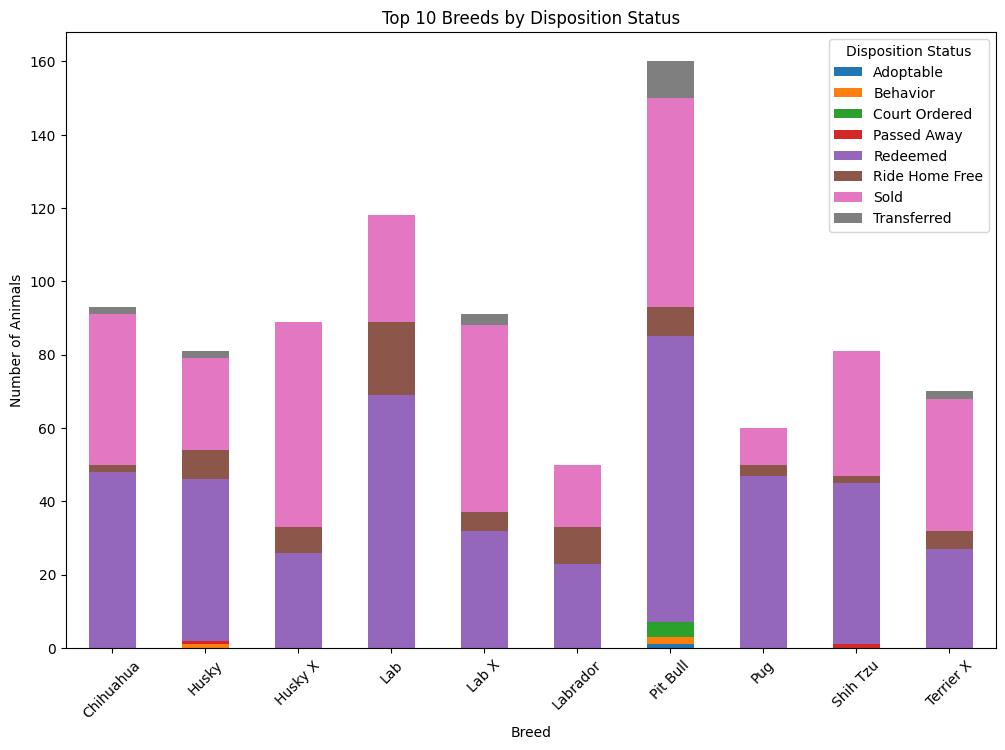

In [17]:
# Cell 25: Top 10 breeds by disposition status
top_breeds = df_cleaned['Breed'].value_counts().head(10).index
breed_disposition = df_cleaned[df_cleaned['Breed'].isin(top_breeds)].groupby(['Breed', 'Status']).size().unstack().fillna(0)

# Plot breed vs disposition
breed_disposition.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 10 Breeds by Disposition Status')
plt.xlabel('Breed')
plt.ylabel('Number of Animals')
plt.xticks(rotation=45)
plt.legend(title='Disposition Status')
plt.show()


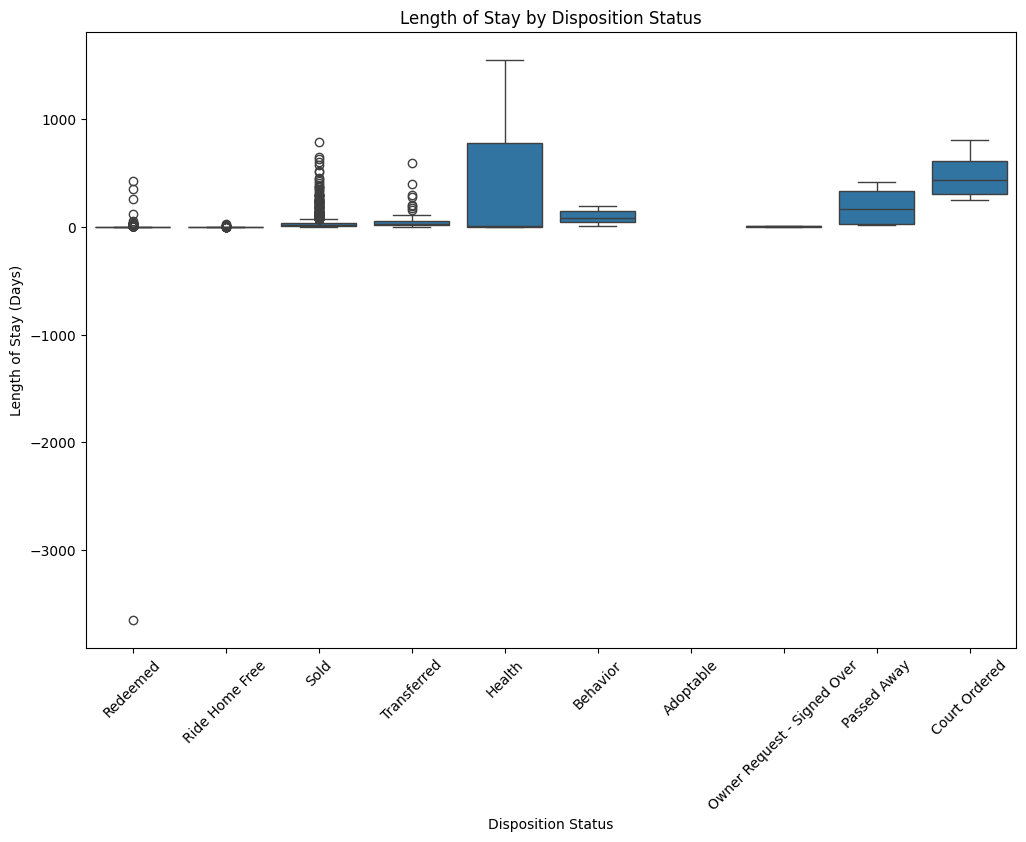

In [18]:
# Cell 26: Length of stay by disposition status
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='Status', y='LengthOfStay')
plt.title('Length of Stay by Disposition Status')
plt.xlabel('Disposition Status')
plt.ylabel('Length of Stay (Days)')
plt.xticks(rotation=45)
plt.show()


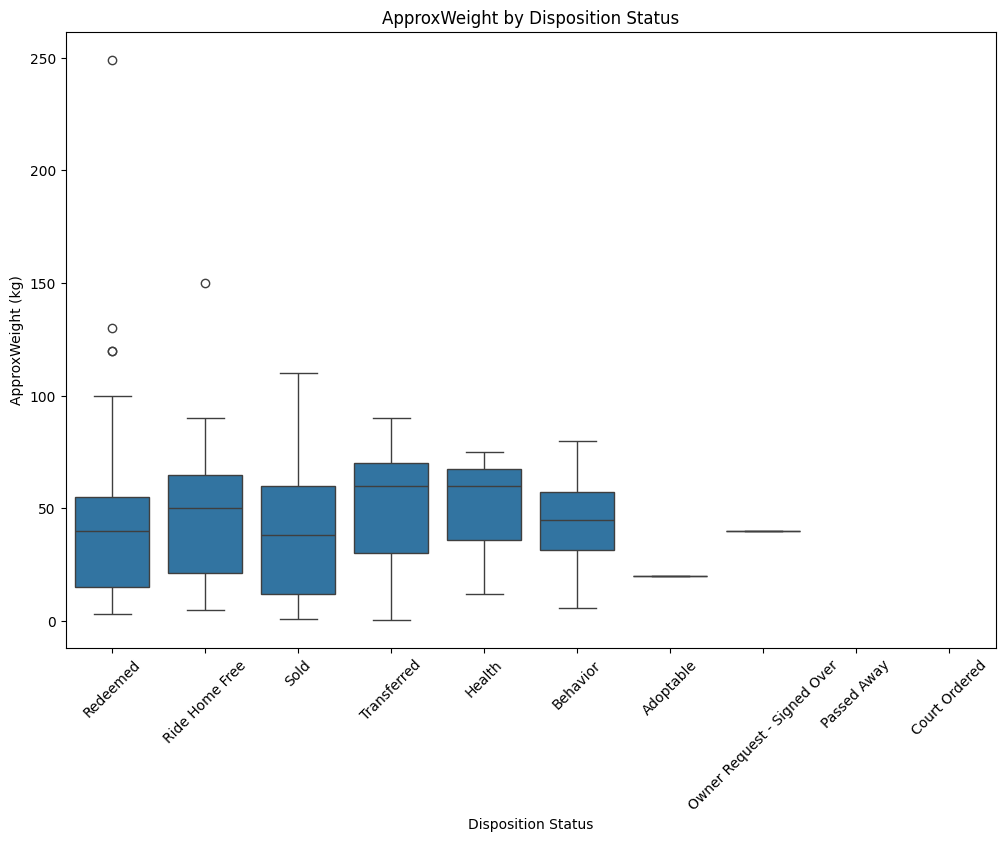

In [19]:
# Cell 27: Weight by disposition status
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='Status', y='ApproxWeight')
plt.title('ApproxWeight by Disposition Status')
plt.xlabel('Disposition Status')
plt.ylabel('ApproxWeight (kg)')
plt.xticks(rotation=45)
plt.show()


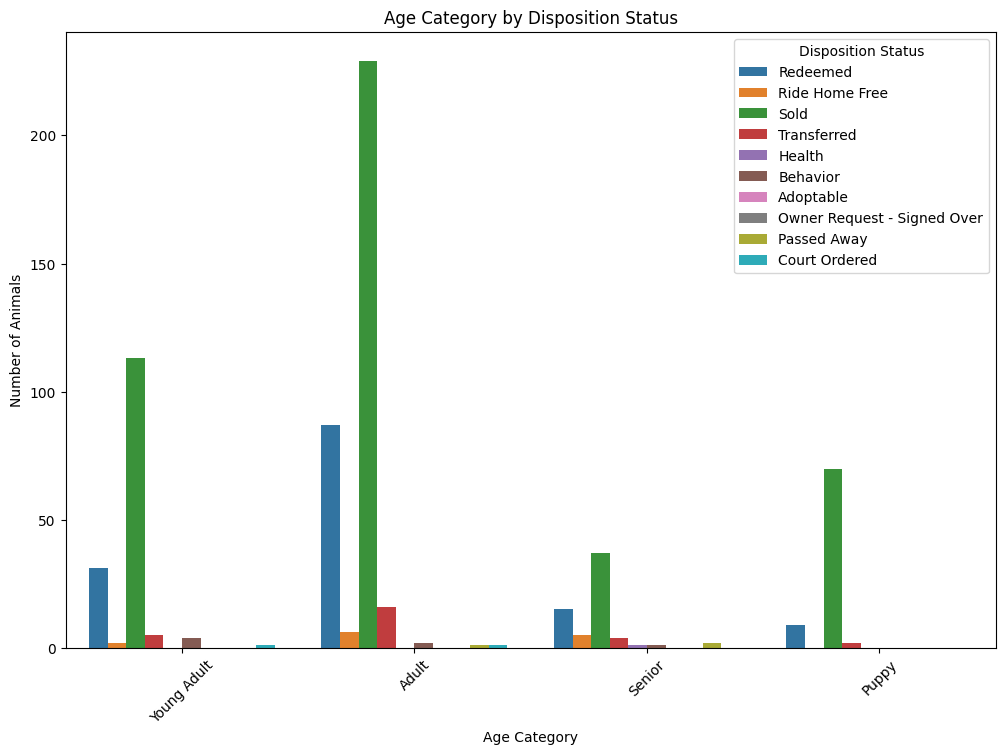

In [20]:
# Cell 28: Age category by disposition status
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='Age category', hue='Status')
plt.title('Age Category by Disposition Status')
plt.xlabel('Age Category')
plt.ylabel('Number of Animals')
plt.xticks(rotation=45)
plt.legend(title='Disposition Status')
plt.show()


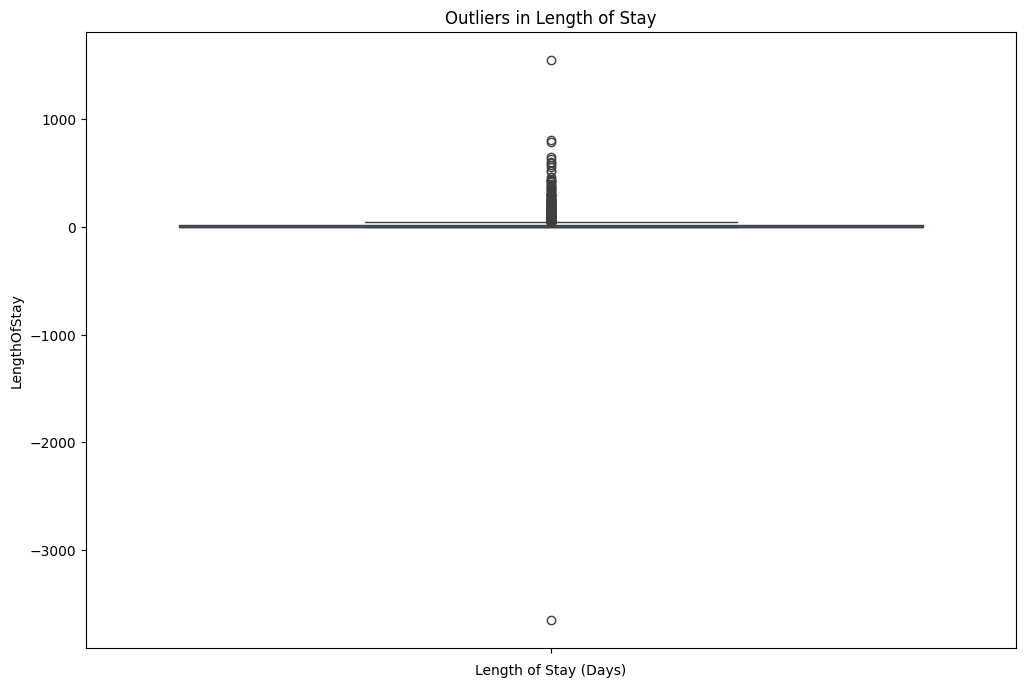

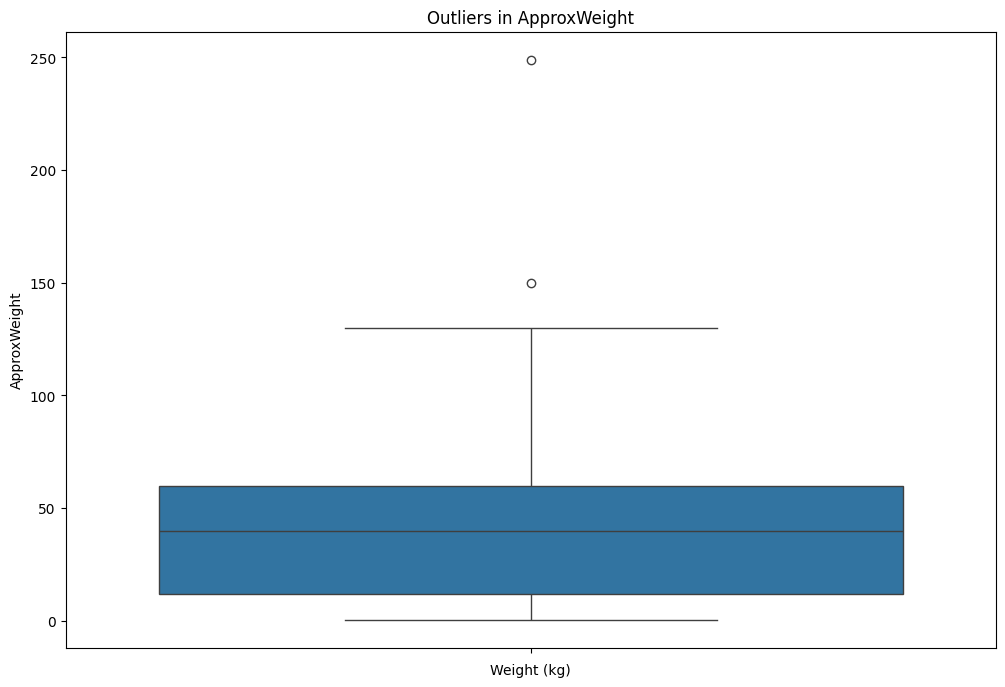

In [21]:
# Cell 29: Identify outliers in the length of stay
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned['LengthOfStay'].dropna())
plt.title('Outliers in Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.show()

# Cell 30: Identify outliers in the approximate weight
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned['ApproxWeight'].dropna())
plt.title('Outliers in ApproxWeight')
plt.xlabel('Weight (kg)')
plt.show()


In [22]:
# Cell 31: Prepare data for predictive modeling (handle categorical data and missing values)
df_model = df_cleaned[['Breed', 'Sex', 'ApproxWeight', 'LengthOfStay', 'Status']].dropna()

# Convert categorical columns to numerical (e.g., Breed, Sex)
df_model = pd.get_dummies(df_model, columns=['Breed', 'Sex'], drop_first=True)

# Convert Status to a binary outcome (1 for 'Adopted', 0 for others as an example)
df_model['Status'] = df_model['Status'].apply(lambda x: 1 if x == 'Adopted' else 0)

# Preview the prepared dataset
df_model.head()


,ApproxWeight,LengthOfStay,Status,Breed_Airedale X Lab,Breed_Akbash,Breed_Akita X,Breed_Akita X Mastiff,Breed_Am Bull X Mastiff,Breed_Am Bulldog,Breed_Am Eskimo,...,Breed_Yorkie,Breed_Yorkie X,Breed_Yorkie X Daschund,Breed_Yorkie X Terrier,Breed_Yorkshire Terrier,Breed_lab X hound,Sex_F/S,Sex_M,Sex_M/N,Sex_X
10,35.0,2.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,10.0,17.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
43,5.0,3.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
48,40.0,1.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
49,75.0,1.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [25]:
# Check unique values in the Status column
df_cleaned['Status'].unique()


array(['Redeemed', 'Ride Home Free', 'Sold', 'Transferred', 'Health',
       'Behavior', 'Adoptable', 'Owner Request - Signed Over',
       'Passed Away', 'Court Ordered'], dtype=object)

In [26]:
# Cell: Check the original values of the Status column before converting to binary
df_cleaned['Status'].value_counts()


,count
Status,
Sold,1571
Redeemed,1553
Ride Home Free,322
Transferred,83
Behavior,14
Owner Request - Signed Over,6
Health,5
Passed Away,4
Court Ordered,4


In [27]:
# Cell 1: Reclassify the Status column
df_cleaned['StatusBinary'] = df_cleaned['Status'].apply(lambda x: 1 if x in ['Sold', 'Transferred', 'Adoptable'] else 0)

# Check the new classification
print(df_cleaned['StatusBinary'].value_counts())


StatusBinary
0    1908
1    1656
Name: count, dtype: int64


<ipython-input-27-c47aa5bf224d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['StatusBinary'] = df_cleaned['Status'].apply(lambda x: 1 if x in ['Sold', 'Transferred', 'Adoptable'] else 0)


In [28]:
# Cell 2: Prepare data for predictive modeling (use StatusBinary now)
df_model = df_cleaned[['Breed', 'Sex', 'ApproxWeight', 'LengthOfStay', 'StatusBinary']].dropna()

# Convert categorical columns to numerical (e.g., Breed, Sex)
df_model = pd.get_dummies(df_model, columns=['Breed', 'Sex'], drop_first=True)

# Cell 3: Perform train-test split with stratification to maintain class balance
X = df_model.drop('StatusBinary', axis=1)
y = df_model['StatusBinary']

# Stratify based on the binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Cell 4: Train the logistic regression model again
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Cell 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.96      0.92      0.94       116

    accuracy                           0.93       195
   macro avg       0.93      0.94      0.93       195
weighted avg       0.94      0.93      0.93       195



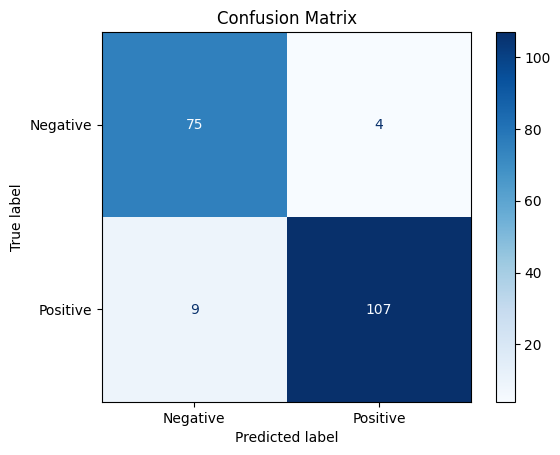

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Cell 6: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


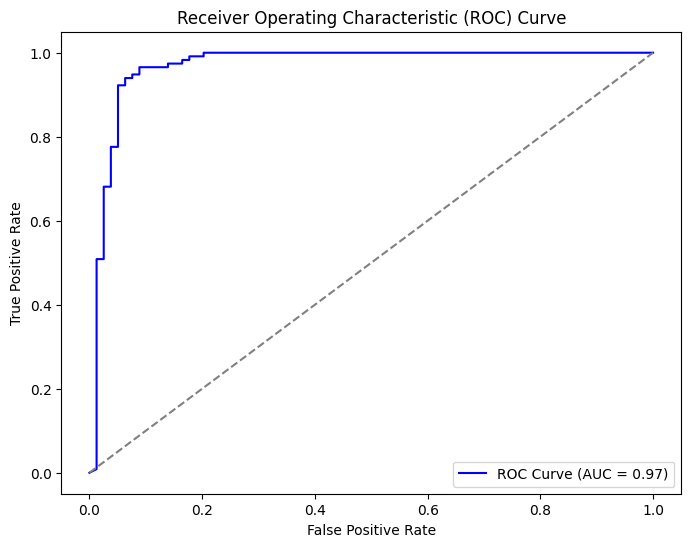

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

# Cell 7: Generate predicted probabilities for ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Cell 8: ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


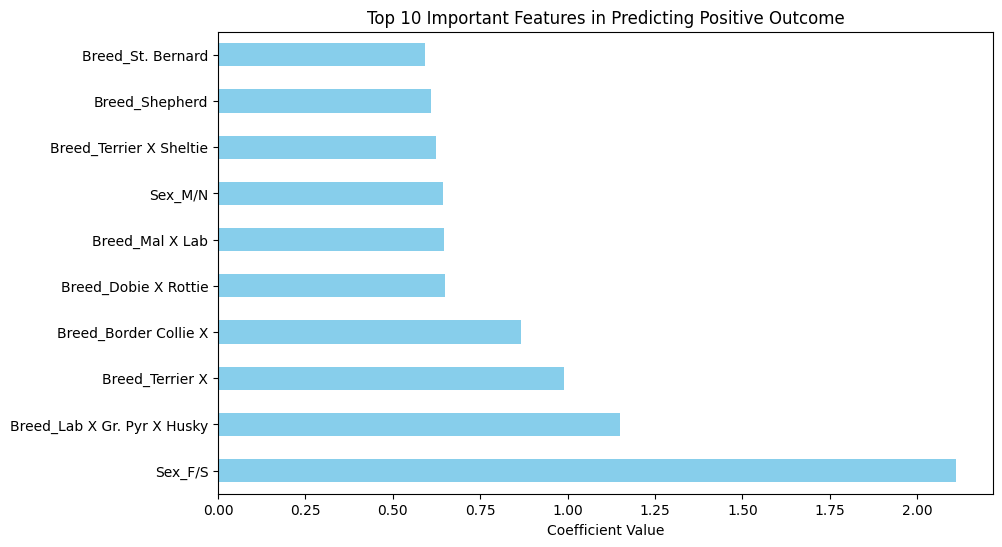

In [31]:
# Cell 9: Feature importance (coefficients of logistic regression)
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients = coefficients.sort_values(ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
coefficients.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features in Predicting Positive Outcome')
plt.xlabel('Coefficient Value')
plt.show()


In [32]:
from sklearn.model_selection import GridSearchCV

# Cell 10: Set up grid search for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers to test
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print best parameters and AUC score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best AUC: {grid_search.best_score_:.4f}')


Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best AUC: 0.9550


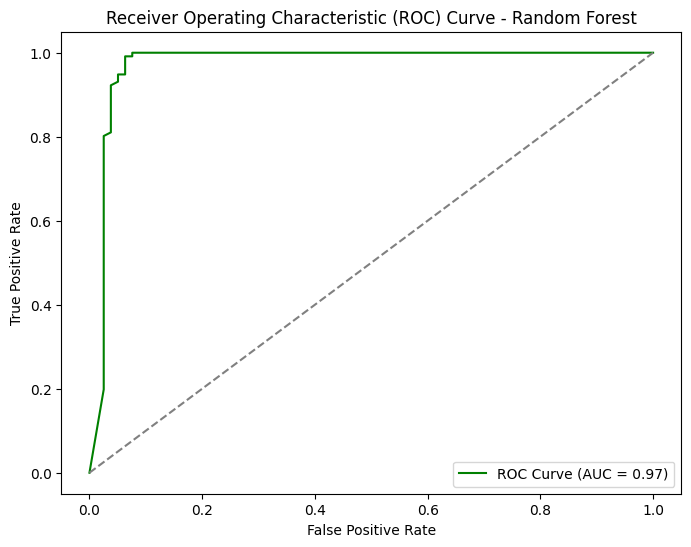

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Cell 11: Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cell 12: Make predictions and evaluate the Random Forest model
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, rf_y_pred_proba):.2f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
